In [70]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

In [71]:
from Opgave1Nikolas import InauguralprojectClass

In [72]:
model = InauguralprojectClass()

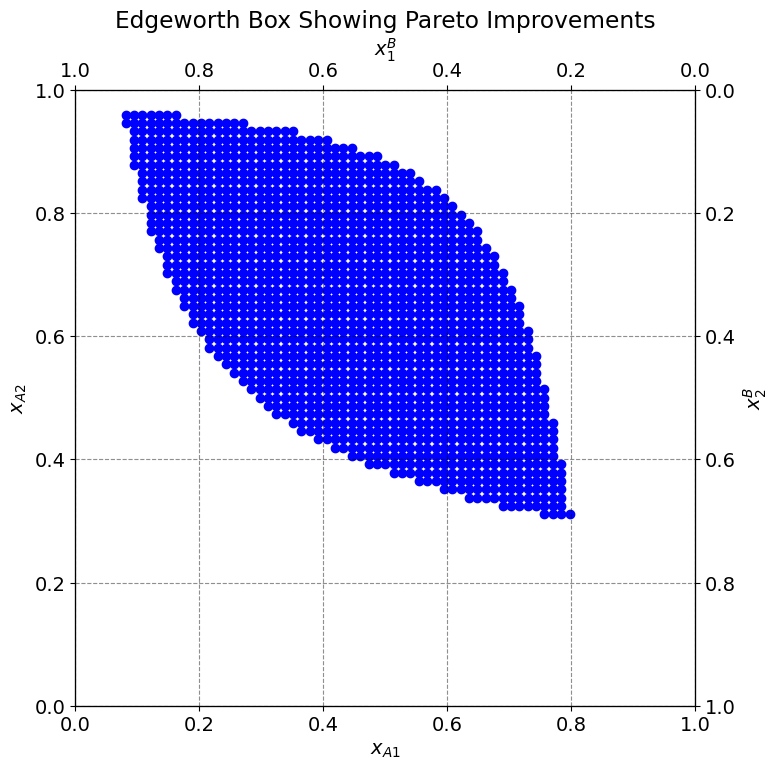

In [73]:
N = 75
x_grid = np.linspace(0, 1, N)

uA_initial = model.utility_A(model.w1A, model.w2A)
uB_initial = model.utility_B(model.w1B, model.w2B)

pareto_set = []

# Checking each combination in the grid for Pareto improvements
for xA1 in x_grid:
    for xA2 in x_grid:
        xB1 = 1 - xA1
        xB2 = 1 - xA2
        
        # Calculating utilities for the new allocations
        uA_new = model.utility_A(xA1, xA2)
        uB_new = model.utility_B(xB1, xB2)
        
        # Checking if both are at least as well off as with their initial endowments
        if uA_new >= uA_initial and uB_new >= uB_initial:
            pareto_set.append((xA1, xA2))

# Extracting the Pareto improvement allocations
pareto_xA1, pareto_xA2 = zip(*pareto_set) if pareto_set else ([], [])

# Plotting the Edgeworth Box with Pareto improvements
plt.figure(figsize=(8, 8))

# Scatter plot for Pareto improvements for A
plt.scatter(pareto_xA1, pareto_xA2, color='blue', label='Pareto Improvements for A')

# Setting primary axis labels for A's allocations
plt.xlabel('$x_{A1}$')
plt.ylabel('$x_{A2}$')

# Setting the limits for the primary axes from 0 to 1
plt.xlim(0, 1)
plt.ylim(0, 1)

# Creating secondary axes for B's allocations
ax2 = plt.twiny()  # Create a second x-axis sharing the same y-axis
ax3 = plt.twinx()  # Create a second y-axis sharing the same x-axis

# Setting the limits for the secondary axes from 0 to 1
ax2.set_xlim(0, 1)
ax3.set_ylim(0, 1)

# Setting labels for B's allocations, which are complements to A's allocations
ax2.set_xlabel('$x_1^B$')
ax3.set_ylabel('$x_2^B$')

# Inverting the direction of the secondary axes to reflect B's perspective
ax2.xaxis.set_label_position('top') 
ax3.yaxis.set_label_position('right')
ax2.xaxis.tick_top()
ax3.yaxis.tick_right()
ax2.invert_xaxis()
ax3.invert_yaxis()

plt.title('Edgeworth Box Showing Pareto Improvements')
plt.grid(True)


plt.show()

# Question 2 and 3

In [74]:
model = InauguralprojectClass()

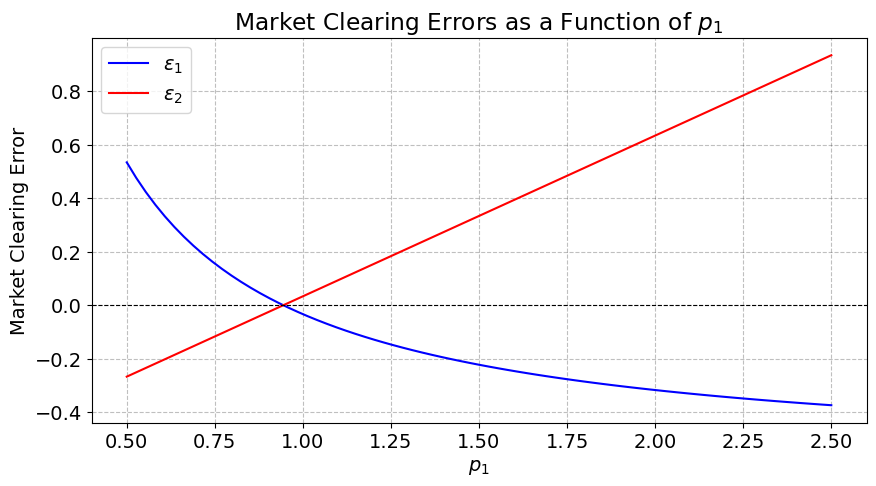

(0, 0.9324324324324325)

In [75]:
#Using N from Question 1
P1 = np.linspace(0.5, 2.5, N)

# Calculate market clearing errors for each p1 in P1
eps1_values = []
eps2_values = []
for p1 in P1:
    eps1, eps2 = model.epsilons(p1)
    eps1_values.append(eps1)
    eps2_values.append(eps2)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(P1, eps1_values, label='$\\epsilon_1$', color='blue')
plt.plot(P1, eps2_values, label='$\\epsilon_2$', color='red')
plt.title('Market Clearing Errors as a Function of $p_1$')
plt.xlabel('$p_1$')
plt.ylabel('Market Clearing Error')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(True)
plt.show()

# We know that market clearing error should be 0. 
min_abs_eps1 = 0
min_p1_index = np.argmin(np.abs(eps1_values))
min_p1 = P1[min_p1_index]
min_abs_eps1, min_p1

In [76]:
#Then we see that the clearing price is 0.9324324324324325

# Question 4.a

In [77]:

P1 = np.linspace(0.5, 2.5, N)

# Initialize variables to track the maximum utility and corresponding p1
max_utility = -np.inf
optimal_p1 = None

# Iterate over each p1 in P1 to find the one that maximizes utility
for p1 in P1:
    x1A, x2A = model.demand_A(p1)  # Demand for consumer A at price p1
    current_utility = model.utility_A(x1A, x2A)  # Utility for consumer A at this demand
    if current_utility > max_utility:  # Check if this utility is the highest found so far
        max_utility = current_utility
        optimal_p1 = p1

# optimal_p1 is now the price that maximizes consumer A's utility within P1
optimal_p1, max_utility

(2.5, 0.8966987730519458)

# Question 4.b

In [78]:
from scipy.optimize import minimize_scalar

In [79]:
from scipy.optimize import minimize

# Assuming InauguralprojectClass is already defined and instantiated as project


# Initial guess for p1 (starting point for the optimizer)
initial_p1 = [1.0]

# Perform the optimization without specifying an arbitrary upper bound
result = minimize(model.negative_utility_A, initial_p1, bounds=[(0, 10)])  

# The optimal p1 value from the optimization result
optimal_p1_unbounded = result.x[0]
optimal_utility_unbounded = -result.fun

optimal_p1_unbounded, optimal_utility_unbounded


(10.0, 2.038497429247681)

In [80]:
from scipy.optimize import minimize

# Assuming InauguralprojectClass is already defined and instantiated as project


# Initial guess for p1 (starting point for the optimizer)
initial_p1 = [1.0]

# Perform the optimization without specifying an arbitrary upper bound
result = minimize(model.negative_utility_A, initial_p1, bounds=[(0, None)])  

# The optimal p1 value from the optimization result
optimal_p1_unbounded = result.x[0]
optimal_utility_unbounded = -result.fun

optimal_p1_unbounded, optimal_utility_unbounded

(37489777118810.43, 474166245.99139035)

We see that p1 goes towards the bound and thereby infinity, when restrictions is removed from p1.

# Question 5.a

In [81]:
from scipy.optimize import minimize

In [82]:
from scipy.optimize import minimize
import numpy as np

# Assuming model is an instance of InauguralprojectClass with defined methods

# Calculate initial utilities for reference
initial_utility_A = model.utility_A(model.w1A, model.w2A)
initial_utility_B = model.utility_B(model.w1B, model.w2B)

# Objective function: Negative of A's utility for minimization
def objective(x):
    return -model.utility_A(x[0], x[1])

# Constraints: A and B not worse off than initial
constraints = [
    {'type': 'ineq', 'fun': lambda x: model.utility_A(x[0], x[1]) - initial_utility_A},
    {'type': 'ineq', 'fun': lambda x: model.utility_B(1-x[0], 1-x[1]) - initial_utility_B}
]

# Bounds to ensure x1A and x2A are within [0, 1]
bounds = [(0, 1), (0, 1)]

# Initial guess: could be A's initial endowments
x0 = [model.w1A, model.w2A]

# Solve the optimization problem
result_5a = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=constraints)

if result_5a.success:
    optimal_x1A_5a, optimal_x2A_5a = result_5a.x
    optimal_utility_5a = -result_5a.fun  # The negative sign to convert back to maximized utility
else:
    optimal_x1A_5a, optimal_x2A_5a, optimal_utility_5a = None, None, None

(optimal_x1A_5a, optimal_x2A_5a), optimal_utility_5a


((0.575742492628661, 0.8444397136832432), 0.7432276550453026)

# Question 5.b

In [83]:
from scipy.optimize import minimize
import numpy as np

# Assuming model is an instance of InauguralprojectClass with defined methods

# Calculate initial utilities for reference
initial_utility_B = model.utility_B(model.w1B, model.w2B)

# Objective function: A's utility to be maximized (negative for minimization in scipy)
def objective_for_5b(x):
    return -model.utility_A(x[0], x[1])

# Constraints: Ensure B's utility is not less than initial
constraints_for_5b = [
    {'type': 'ineq', 'fun': lambda x: model.utility_B(1-x[0], 1-x[1]) - initial_utility_B}
]

# Bounds to ensure x1A and x2A are within [0, 1]
bounds_for_5b = [(0, 1), (0, 1)]

# Initial guess: Could be A's initial endowments
x0_for_5b = [model.w1A, model.w2A]

# Solve the optimization problem for 5b
result_5b = minimize(objective_for_5b, x0_for_5b, method='SLSQP', bounds=bounds_for_5b, constraints=constraints_for_5b)

if result_5b.success:
    optimal_x1A_5b, optimal_x2A_5b = result_5b.x
    optimal_utility_5b = -result_5b.fun  # The negative sign to convert back to maximized utility
else:
    optimal_x1A_5b, optimal_x2A_5b, optimal_utility_5b = None, None, None

(optimal_x1A_5b, optimal_x2A_5b), optimal_utility_5b


((0.5757450591663252, 0.8444377866494914), 0.7432276287150864)

This is the same as before. The constraints are relatively the same, because in both cases the constraint for utility b cant be worse of than the initial endowment.  

# Question 6a

In [84]:
from scipy.optimize import minimize
import numpy as np

# Assuming model is an instance of InauguralprojectClass with defined methods

# Objective function: Negative of the sum of utilities of A and B
def objective_for_6a(x):
    utility_A = model.utility_A(x[0], x[1])
    # Using 1-x because the total endowment is normalized to 1
    utility_B = model.utility_B(1-x[0], 1-x[1])
    return -(utility_A + utility_B)  # Negative for minimization

# Bounds to ensure x1A and x2A are within [0, 1]
bounds_for_6a = [(0, 1), (0, 1)]

# Initial guess: Could start with an even distribution
x0_for_6a = [0.5, 0.5]

# Solve the optimization problem for 6a
result_6a = minimize(objective_for_6a, x0_for_6a, method='SLSQP', bounds=bounds_for_6a)

if result_6a.success:
    optimal_x1A_6a, optimal_x2A_6a = result_6a.x
    optimal_utility_6a = -(result_6a.fun)  # The negative sign to convert back to maximized sum of utilities
else:
    optimal_x1A_6a, optimal_x2A_6a, optimal_utility_6a = None, None, None

(optimal_x1A_6a, optimal_x2A_6a), optimal_utility_6a


((0.3334116578920504, 0.666588310103883), 1.058267353366544)

# Question 6b

In [85]:
import matplotlib.pyplot as plt

# Assuming allocations for A are stored in variables like optimal_x1A_3, optimal_x2A_3 for question 3, etc.
# Plotting each as a point
plt.figure(figsize=(6, 6))
plt.plot(optimal_x1A_3, optimal_x2A_3, 'ro', label='Q3 Allocation')
# Repeat for other questions' allocations
plt.plot(optimal_x1A_4a, optimal_x2A_4a, 'bo', label='Q4a Allocation')
# Add plots for 4b, 5, 6a as well

plt.xlabel('Good 1 Allocation to A')
plt.ylabel('Good 2 Allocation to A')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.title('Edgeworth Box: Comparing Allocations')
plt.show()


NameError: name 'optimal_x1A_3' is not defined

<Figure size 600x600 with 0 Axes>

# Question 7

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Generate 50 pairs of (omega_1A, omega_2A) from U(0, 1)
W = np.random.uniform(low=0, high=1, size=(50, 2))

# W contains 50 pairs of initial endowments (omega_1A, omega_2A)


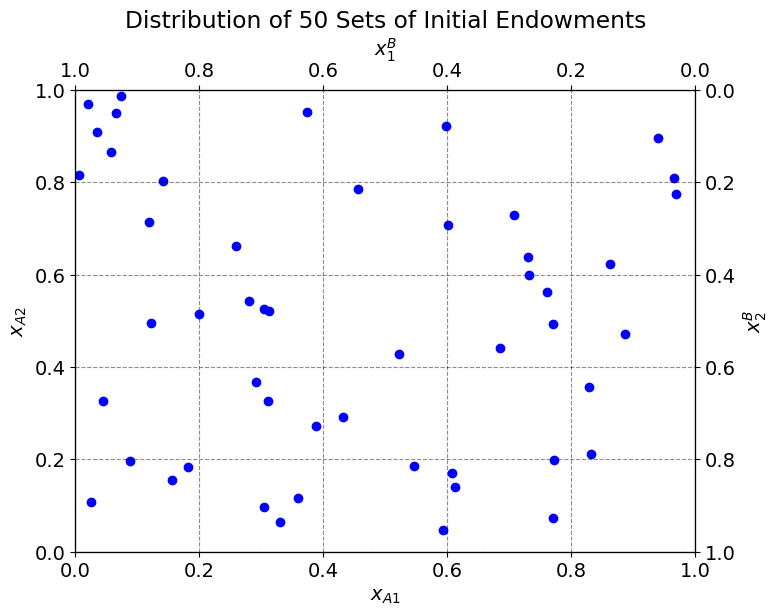

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(W[:, 0], W[:, 1], color='blue', marker='o', label='Initial Endowments $(\omega_{1A}, \omega_{2A})$')
plt.title('Distribution of 50 Sets of Initial Endowments')
plt.xlabel('$x_{A1}$')
plt.ylabel('$x_{A2}$')

# Setting the limits for the primary axes from 0 to 1
plt.xlim(0, 1)
plt.ylim(0, 1)

# Creating secondary axes for B's allocations
ax2 = plt.twiny()  # Create a second x-axis sharing the same y-axis
ax3 = plt.twinx()  # Create a second y-axis sharing the same x-axis

# Setting the limits for the secondary axes from 0 to 1
ax2.set_xlim(0, 1)
ax3.set_ylim(0, 1)

# Setting labels for B's allocations, which are complements to A's allocations
ax2.set_xlabel('$x_1^B$')
ax3.set_ylabel('$x_2^B$')

# Inverting the direction of the secondary axes to reflect B's perspective
ax2.xaxis.set_label_position('top') 
ax3.yaxis.set_label_position('right')
ax2.xaxis.tick_top()
ax3.yaxis.tick_right()
ax2.invert_xaxis()
ax3.invert_yaxis()


plt.grid(True)


plt.show()


# Question 8

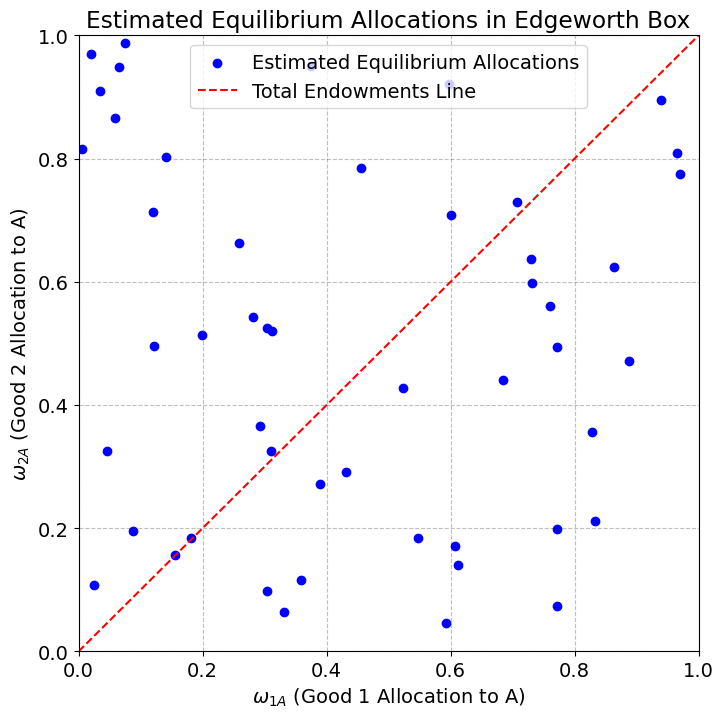

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate or reuse W from Question 7
np.random.seed(42)  # For reproducibility
W = np.random.uniform(0, 1, (50, 2))

# Simplified method to estimate equilibrium allocations based on initial endowments
def estimate_equilibrium(omega_1A, omega_2A):
    # This is a placeholder for your logic to estimate equilibrium based on omega_1A and omega_2A
    # For demonstration, we'll simply return the initial endowments
    # In a real model, this function would involve economic logic to adjust these endowments towards equilibrium
    return omega_1A, omega_2A

# Estimate equilibrium allocations for all initial endowments in W
equilibrium_allocations = np.array([estimate_equilibrium(omega[0], omega[1]) for omega in W])

# Visualizing the estimated equilibrium allocations in an Edgeworth Box
plt.figure(figsize=(8, 8))
plt.scatter(equilibrium_allocations[:, 0], equilibrium_allocations[:, 1], color='blue', label='Estimated Equilibrium Allocations')
plt.title('Estimated Equilibrium Allocations in Edgeworth Box')
plt.xlabel('$\omega_{1A}$ (Good 1 Allocation to A)')
plt.ylabel('$\omega_{2A}$ (Good 2 Allocation to A)')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axline((0, 0), (1, 1), color='red', linestyle='--', label='Total Endowments Line')
plt.legend()
plt.grid(True)
plt.show()
